## CPMSC 448 Homework 2
### Problem 4

#### Name:
#### PSU id:


In this problem will use the Pima Indians Diabetes dataset from the UCI repository to experiment with the $k$-NN algorithm and find the optimal value for the number of neighbors  $k$. You do not need to implement the algorithm and encouraged to use the implementation in \texttt{scikit-learn}.


### a) 
Download the provided `Pima.csv` data file and load it using `pandas`. As a sanity check, make sure  there are 768 rows of data (potential diabetes patients) and 9 columns (8 input features including  `Pregnancies`, `Glucose`, `BloodPressure`, `SkinThickness`, `Insulin`, `BMI`, `DiabetesPedigreeFunction`, `Age`, and 1 target output). Note that the data file has no header and you might want to explicitly create the header. The last value in each row contains the target label for that row, and the remaining values are the features. Report the statics of each feature (min, max, average) and the histogram of the labels (target outputs).
    

(768, 9)
<bound method NDFrame.describe of      Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  Result  
0                      

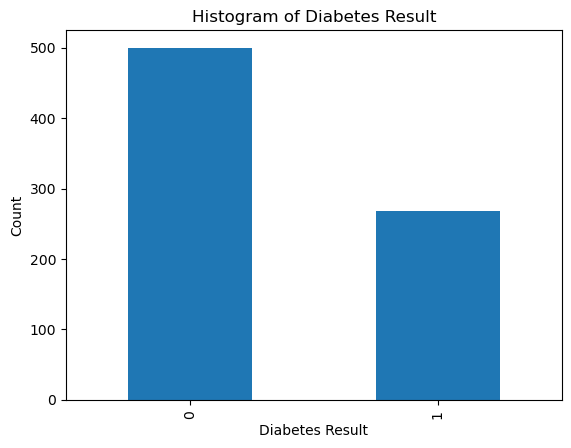

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
columns = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 
           'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Result']
data = pd.read_csv("Pima.csv", names=columns)
print(data.shape)
print(data.describe)
data['Result'].value_counts().plot(kind='bar')
plt.xlabel("Diabetes Result")
plt.ylabel("Count")
plt.title("Histogram of Diabetes Result")
plt.show()

### b) 
Split the data into training and test data with 80\% training and 20\% test data sizes. 

Use 5-fold cross-validation on training data to decide the best number of neighbours $k$. To this end, you can use the built in functionality in  `scikit-learn` such as `cross_val_score`. For $k=1,2,3,\ldots, 15$ compute the 5-fold cross validation error and plot the results  (with values of $k$ on the $x$-axis and accuracy on the $y$-axis). Include the plot in your report and justify your decision for picking a particular number of neighbors $k$.

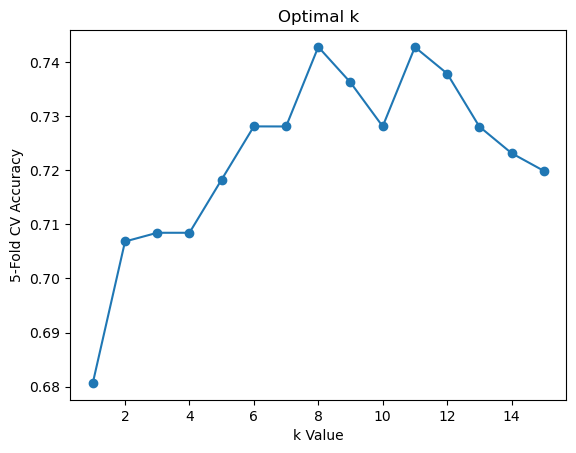

Optimal number of neighbors: 8


In [4]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
import numpy as np
import matplotlib.pyplot as plt

X = data.drop('Result', axis=1)
y = data['Result']

xTrain, xTest, yTrain, yTest = train_test_split(X, y, test_size=0.2, random_state=42)

kRange = range(1, 16)
cvScores = []

for k in kRange:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, xTrain, yTrain, cv=5, scoring='accuracy')
    cvScores.append(scores.mean())

plt.plot(kRange, cvScores, marker='o')
plt.xlabel('k Value')
plt.ylabel('5-Fold CV Accuracy')
plt.title('Optimal k')
plt.show()

optimalK = kRange[np.argmax(cvScores)]
print("Optimal number of neighbors:", optimalK)


### c ) 
Evaluate the $k$-NN algorithm on test data with the optimal number of neighbours you obtained in previous step and report the test error.

In [5]:
from sklearn.metrics import accuracy_score

knnOpt = KNeighborsClassifier(n_neighbors=optimalK)
knnOpt.fit(xTrain, yTrain)

yPred = knnOpt.predict(xTest)

testAccuracy = accuracy_score(yTest, yPred)
testError = 1 - testAccuracy

print("Test accuracy:", testAccuracy)
print("Test error:", testError)

Test accuracy: 0.7467532467532467
Test error: 0.2532467532467533


### d) 
Process the input data  by subtracting the mean (a.k.a. centralization) and dividing by the standard deviation (a.k.a. standardization) over each dimension (feature),  repeat the previous part and report the accuracy. Do centralization and standardization affect the accuracy? Why?

In [6]:
xTrainCent = xTrain - xTrain.mean()
xTestCent = xTest - xTrain.mean()

xTrainStd = xTrainCent / xTrain.std()
xTestStd = xTestCent / xTrain.std()

optimal = KNeighborsClassifier(n_neighbors=10)
optimal.fit(xTrainStd, yTrain)

yPred = optimal.predict(xTestStd)
accuracy = accuracy_score(yTest, yPred)

print('Accuracy:', accuracy)
testError = 1 - accuracy
print('Test Error:', testError)


Accuracy: 0.6883116883116883
Test Error: 0.3116883116883117
